# 12-752: Data-Driven Building Energy Management
## Fall 2017, Carnegie Mellon University

## Assignment \#2


## Zhuoran Zhang ID: zhuoran1 ##

## Task 1: 

In [311]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import datetime as dt
import seaborn as sns
from scipy.interpolate import spline  

In [312]:
f=open('campusDemand.csv')
df=pd.read_csv(f,sep=',', header='infer', parse_dates=[1])
df = df.drop(df.columns[[3,4]],axis=1)
df

,Point name,Time,Value
0,Porter Hall Electric (Shark 30) - Watts,2014-09-10 00:00:50,80635.421875
1,Porter Hall Electric (Shark 30) - Watts,2014-09-10 00:01:50,77046.992188
2,Porter Hall Electric (Shark 30) - Watts,2014-09-10 00:02:50,76787.828125
3,Porter Hall Electric (Shark 30) - Watts,2014-09-10 00:03:50,79804.031250
4,Porter Hall Electric (Shark 30) - Watts,2014-09-10 00:04:50,79397.078125
5,Porter Hall Electric (Shark 30) - Watts,2014-09-10 00:05:50,76951.484375
6,Porter Hall Electric (Shark 30) - Watts,2014-09-10 00:06:50,77805.484375
7,Porter Hall Electric (Shark 30) - Watts,2014-09-10 00:07:50,79781.570312
8,Porter Hall Electric (Shark 30) - Watts,2014-09-10 00:08:50,78807.437500
9,Porter Hall Electric (Shark 30) - Watts,2014-09-10 00:09:50,79081.734375


## Task 2:

In [313]:
#change the name of columns to 'P', 'T' and 'V'(represents 'Point Value', 'Time' and 'Value')
df.columns = list("PTV")
pointNames = df['P'].unique()
pointNames

array(['Porter Hall Electric (Shark 30) - Watts',
       'Baker Hall Electric (Shark 29) - Watts',
       'Scaife Hall Electric (Shark 21) - Watts',
       'Doherty Apts Electric (Shark 11) - Demand Watts',
       'University Center Electric (Shark 34) - Watts',
       'Electric kW Calculations - Main Campus kW',
       'Baker Hall Electric (Shark 29) - Demand Watts '], dtype=object)

In [314]:
df_BP = df[(df['P'] == pointNames[0]) | (df['P'] == pointNames[1])| (df['P'] == pointNames[6])]
pointNames=df_BP['P'].unique()
pointNames

array(['Porter Hall Electric (Shark 30) - Watts',
       'Baker Hall Electric (Shark 29) - Watts',
       'Baker Hall Electric (Shark 29) - Demand Watts '], dtype=object)

## Task 3:

I used "three-sigma" rule in each day and building to detect the outliers.

0.0
333874.40625
138996.63070306132
63868.4569378221


False    166857
Name: V, dtype: int64

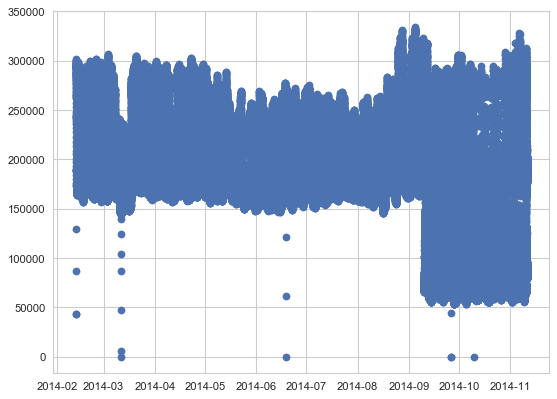

In [315]:
plt.figure(figsize=(8,6),dpi=80)
plt.plot_date(df_BP['T'],df_BP['V'])
print(np.min(df_BP['V']))
print(np.max(df_BP['V']))
print(np.mean(df_BP['V']))
print(np.std(df_BP['V']))
sum(df_BP.duplicated())#no duplicated
df_BP['V'].isnull().value_counts()#No null value

C:\Users\zhang\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\zhang\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
C:\Users\zhang\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:862: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  self.right = self.right.drop(right_drop, axis=1)


(166857, 8)


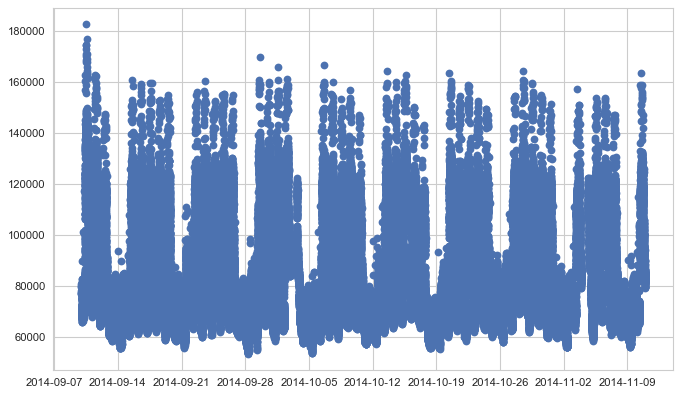

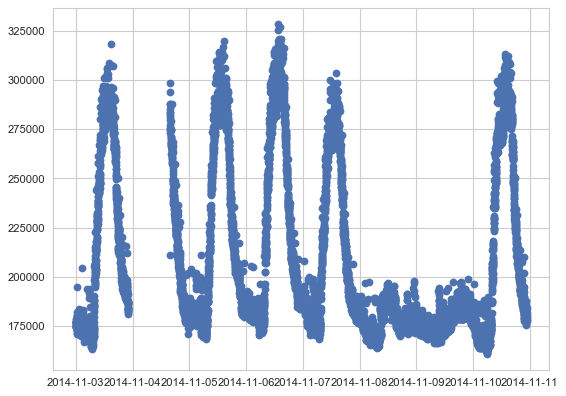

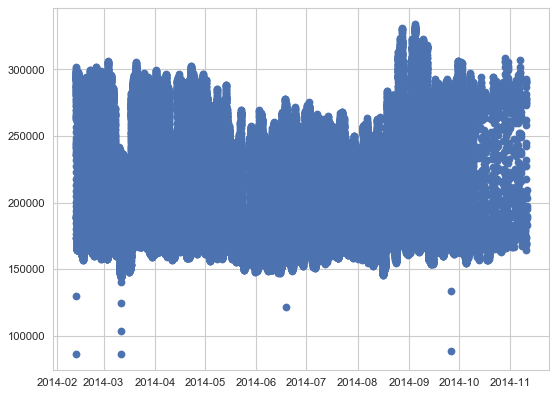

In [316]:
def timetoday(row):
    return str(row['T'])[0:10]
df_BP['day'] = df_BP.apply (lambda row: timetoday (row),axis=1)
grouped = df_BP.groupby(['P', 'day'],as_index=False).agg([np.mean,np.std])
grouped=grouped.reset_index()
df_M=pd.merge(df_BP,grouped, left_on=['P','day'],right_on=['P','day'])
df_M.columns = ['P','T','V','day','mean','std']
def Strange(row):
    return ((row['V']<row['mean']-3*row['std']) or (row['V']>row['mean']+3*row['std']))
df_M['Strange'] = df_M.apply (lambda row: Strange (row),axis=1)
def remedyStrange(row):
    if row['Strange']:
        return row['mean']
    return row['V']
df_M['V_remedy']=df_M.apply(lambda row: remedyStrange(row),axis=1)
print(df_M.shape)
df_M_P=df_M[['Porter Hall' in df_M['P'][i] for i in df_M.index]]
df_M_B=df_M[['Baker Hall Electric (Shark 29) - Watts' in df_M['P'][i] for i in df_M.index]]
df_M_B_D=df_M[['Baker Hall Electric (Shark 29) - Demand Watts' in df_M['P'][i] for i in df_M.index]]
plt.figure(figsize=(10,6),dpi=80)
plt.plot_date(df_M_P['T'],df_M_P['V_remedy'])
plt.figure(figsize=(8,6),dpi=80)
plt.plot_date(df_M_B['T'],df_M_B['V_remedy'])
plt.figure(figsize=(8,6),dpi=80)
plt.plot_date(df_M_B_D['T'],df_M_B_D['V_remedy'])
#Now from the figures below, it seems the data are reasonable now

Using the three-sigma rule,I replaced 279 outliers with their daily average.

## Task 4:

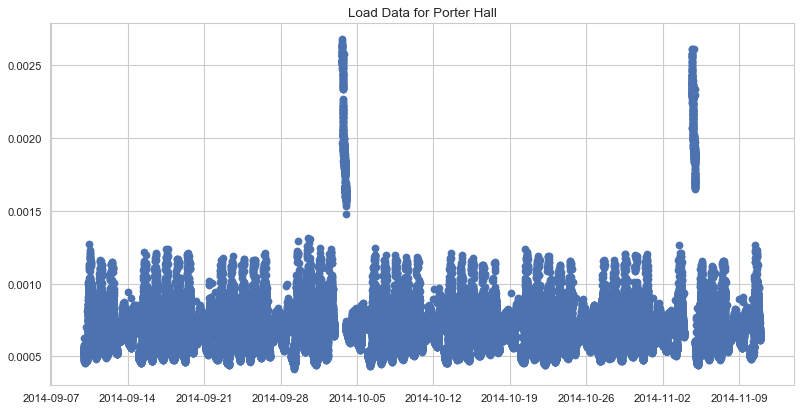

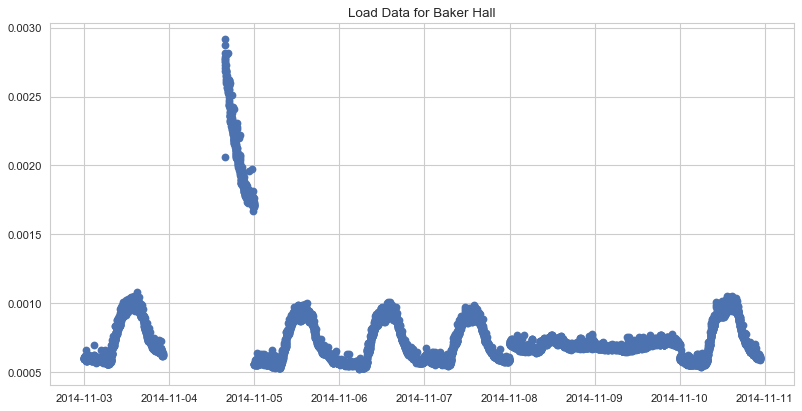

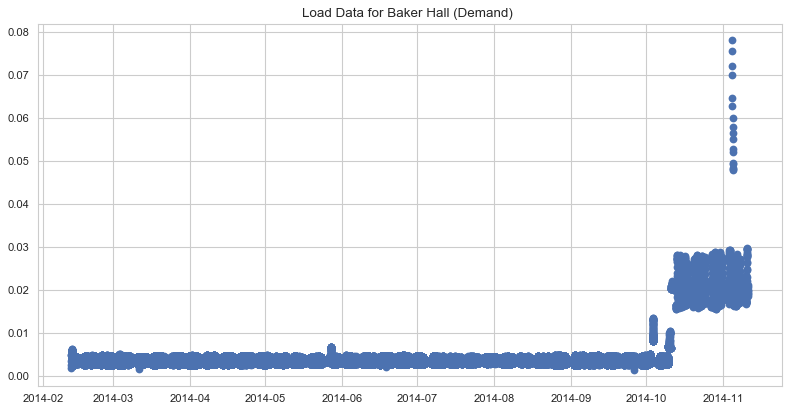

In [317]:
grouped_load = df_M.groupby(['P', 'day'],as_index=False).agg(sum)
grouped_load
df_M_load=pd.merge(df_M,grouped_load, on=['P','day'],suffixes=['_df','_group'])
df_M_load['load']=df_M_load['V_remedy_df']/df_M_load['V_remedy_group']
df_M_load=df_M_load[['P','T','V_remedy_df','day','V_remedy_group','load']]
df_M_load_P=df_M_load[['Porter Hall' in df_M_load['P'][i] for i in df_M_load.index]]
plt.figure(figsize=(12,6),dpi=80)
plt.plot_date(df_M_load_P['T'],df_M_load_P['load'])
plt.title("Load Data for Porter Hall")
df_M_load_B=df_M_load[['Baker Hall Electric (Shark 29) - Watts' in df_M_load['P'][i] for i in df_M_load.index]]
df_M_load_B_D=df_M_load[['Baker Hall Electric (Shark 29) - Demand Watts' in df_M_load['P'][i] for i in df_M_load.index]]
plt.figure(figsize=(12,6),dpi=80)
plt.plot_date(df_M_load_B['T'],df_M_load_B['load'])
plt.title("Load Data for Baker Hall")
plt.figure(figsize=(12,6),dpi=80)
plt.plot_date(df_M_load_B_D['T'],df_M_load_B_D['load'])
plt.title("Load Data for Baker Hall (Demand) ")

The strange points are caused by different amounts of records in each day, let us see if it will affect the analysis later.

## Task 5

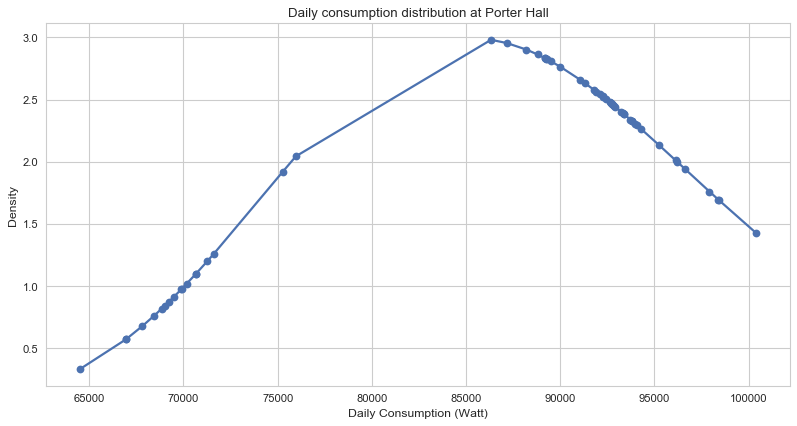

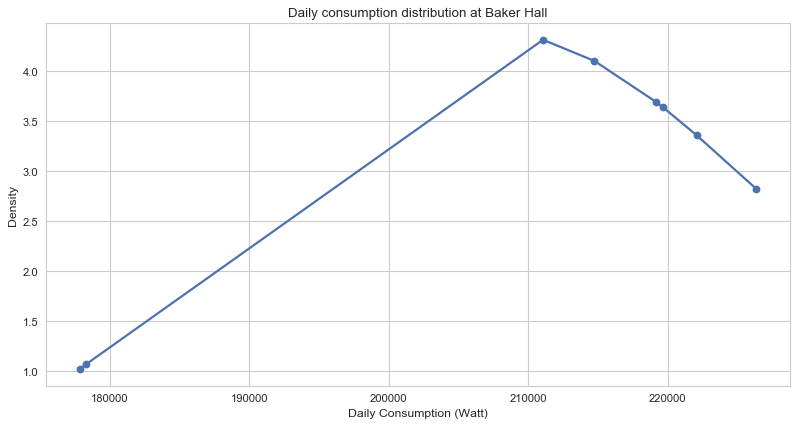

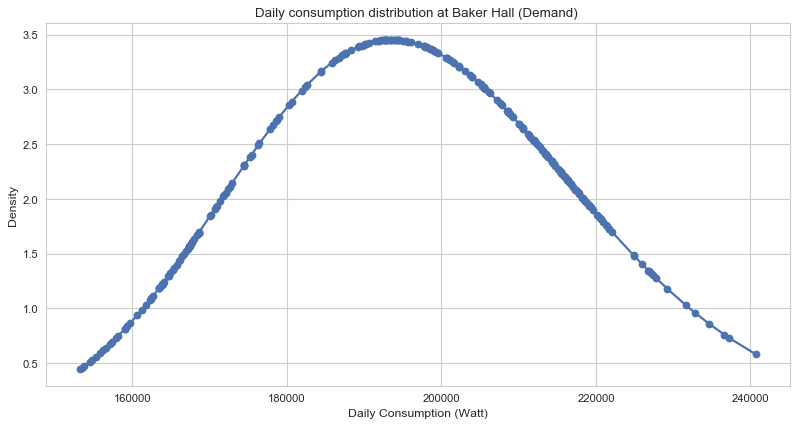

In [318]:
df_P = df_M_load_P.groupby('day',as_index=False).agg(np.mean)
df_P = df_P.drop(df_P.columns[[2,3]],axis=1)
df_B = df_M_load_B.groupby('day',as_index=False).agg(np.mean)
df_B = df_B.drop(df_B.columns[[2,3]],axis=1)
df_B_D = df_M_load_B_D.groupby('day',as_index=False).agg(np.mean)
df_B_D = df_B_D.drop(df_B_D.columns[[2,3]],axis=1)
mu=[np.mean(np.log(1+df_P['V_remedy_df'])),np.mean(np.log(1+df_B['V_remedy_df'])),np.mean(np.log(1+df_B_D['V_remedy_df']))]
sigma=[np.std(np.log(1+df_P['V_remedy_df'])),np.std(np.log(1+df_B['V_remedy_df'])),np.std(np.log(1+df_B_D['V_remedy_df']))]
sumdays=[np.sum(np.log(1+df_P['V_remedy_df'])),np.sum(np.log(1+df_B['V_remedy_df'])),np.sum(np.log(1+df_B_D['V_remedy_df']))]
#print(sumdays)
df_P['lamb']=df_P.apply (lambda row: row['V_remedy_df']/sumdays[0] ,axis=1)
df_B['lamb']=df_B.apply (lambda row: row['V_remedy_df']/sumdays[1] ,axis=1)
df_B_D['lamb']=df_B_D.apply (lambda row: row['V_remedy_df']/sumdays[2] ,axis=1)
#df_P['density']=df_P.apply (lambda row: 1/np.sqrt(2*np.pi*sigma[0]**2)*np.exp(-(row['V_remedy_df']-mu[0])**2/(2*sigma[0]**2)) ,axis=1)
df_P['ga']=df_P.apply (lambda row: 1/np.sqrt(2*np.pi*sigma[0]**2)*np.exp(-(np.log(1+row['V_remedy_df'])-mu[0])**2/(2*sigma[0]**2)) ,axis=1)
df_B['ga']=df_B.apply (lambda row: 1/np.sqrt(2*np.pi*sigma[1]**2)*np.exp(-(np.log(1+row['V_remedy_df'])-mu[1])**2/(2*sigma[1]**2)) ,axis=1)
df_B_D['ga']=df_B_D.apply (lambda row: 1/np.sqrt(2*np.pi*sigma[2]**2)*np.exp(-(np.log(1+row['V_remedy_df'])-mu[2])**2/(2*sigma[2]**2)) ,axis=1)
sortIndex = np.argsort(df_P['V_remedy_df'])  
y1 = df_P['ga'][sortIndex]  
x1 = np.sort(df_P['V_remedy_df'])  
plt.figure(figsize=(12,6),dpi=80)
#Pxnew = np.linspace(np.min(df_P['V_remedy_df']),np.max(df_P['V_remedy_df']),300)
#Psmooth = (df_P['V_remedy_df'],df_P['fa'],Pxnew).Bspline  
plt.plot(x1, y1, 'o-', lw=2)
#plt.plot(df_P['V_remedy_df'],df_P['ga'])
plt.title("Daily consumption distribution at Porter Hall")
plt.ylabel('Density')
plt.xlabel('Daily Consumption (Watt)')
sortIndex = np.argsort(df_B['V_remedy_df'])  
y1 = df_B['ga'][sortIndex]  
x1 = np.sort(df_B['V_remedy_df'])
plt.figure(figsize=(12,6),dpi=80)
plt.plot(x1, y1, 'o-', lw=2)
#plt.plot(df_B['V_remedy_df'],df_B['ga'])
plt.title("Daily consumption distribution at Baker Hall")
plt.ylabel('Density')
plt.xlabel('Daily Consumption (Watt)')
sortIndex = np.argsort(df_B_D['V_remedy_df'])  
y1 = df_B_D['ga'][sortIndex]  
x1 = np.sort(df_B_D['V_remedy_df'])
plt.figure(figsize=(12,6),dpi=80)
plt.plot(x1,y1,'o-', lw=2)
plt.title("Daily consumption distribution at Baker Hall (Demand) ")
plt.ylabel('Density')
plt.xlabel('Daily Consumption (Watt)')

## Task 6:

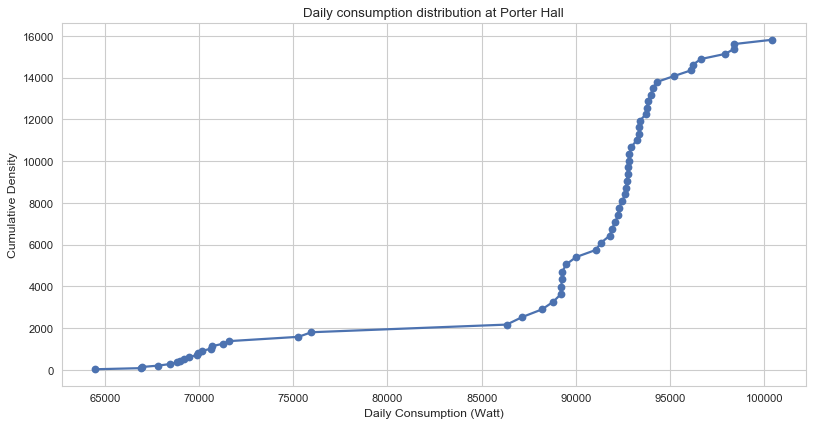

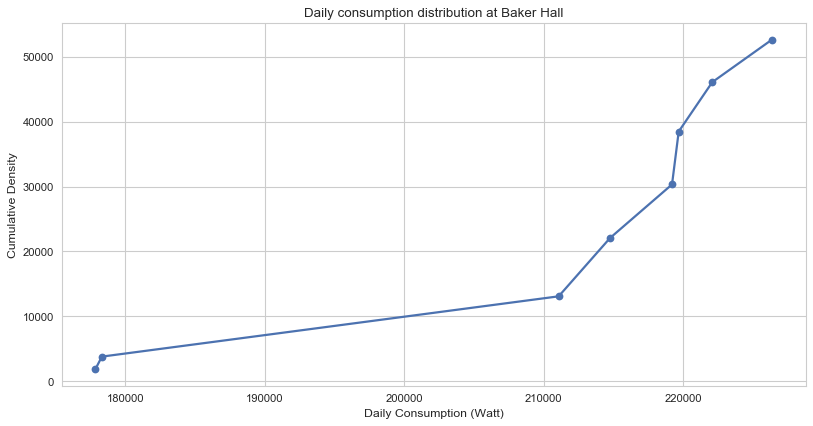

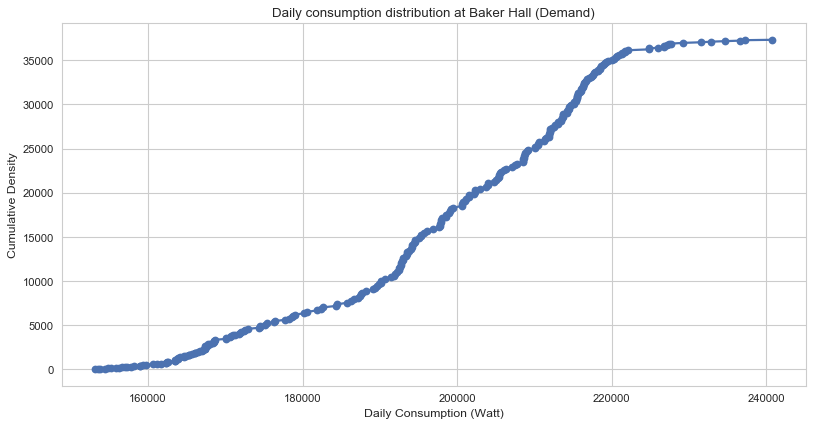

In [319]:
sortIndex = np.argsort(df_P['V_remedy_df'])  
y1 = df_P['ga'][sortIndex]
lamb1 = df_P['lamb'][sortIndex]
fa1 = np.cumsum([y1*lamb1])
x1 = np.sort(df_P['V_remedy_df'])  
plt.figure(figsize=(12,6),dpi=80)
plt.plot(x1, fa1, 'o-', lw=2)
plt.title("Daily consumption distribution at Porter Hall")
plt.ylabel('Cumulative Density')
plt.xlabel('Daily Consumption (Watt)')

sortIndex = np.argsort(df_B['V_remedy_df'])  
y1 = df_B['ga'][sortIndex]
lamb1 = df_B['lamb'][sortIndex]
fa1 = np.cumsum([y1*lamb1])
x1 = np.sort(df_B['V_remedy_df'])  
plt.figure(figsize=(12,6),dpi=80)
plt.plot(x1, fa1, 'o-', lw=2)
plt.title("Daily consumption distribution at Baker Hall")
plt.ylabel('Cumulative Density')
plt.xlabel('Daily Consumption (Watt)')

sortIndex = np.argsort(df_B_D['V_remedy_df'])  
y1 = df_B_D['ga'][sortIndex]
lamb1 = df_B_D['lamb'][sortIndex]
fa1 = np.cumsum([y1*lamb1])
x1 = np.sort(df_B_D['V_remedy_df'])  
plt.figure(figsize=(12,6),dpi=80)
plt.plot(x1, fa1, 'o-', lw=2)
plt.title("Daily consumption distribution at Baker Hall (Demand)")
plt.ylabel('Cumulative Density')
plt.xlabel('Daily Consumption (Watt)')

## Task 7:

Comments:
- For Porter Hall, the most frequent daily consumption is between 85 and 95 Kilo watt. For Baker Hall, the most frequnet daily consumption is between 200 and 220 Kilo watt.(Since the non-demand data are too less to be believable, the discussion here does not include the non-demand data. Follows are similar. It seems Porter Hall consumed less power than Baker Hall.
- Look at the load shape, the shape of Porter Hall is more constrained, or thinner. It indicated the power distribution in Porter Hall has lower variation. It is also verfied that Porter Hall data has smaller standard deviation.
- Both Porter Hall and Baker Hall have a long left tail, it indicated that they are more likely to have a smaller power consumption, and less likely to have a larger power consumption. It is reasonable in the background of academic usage. When there is a holiday, the power consumption should be lower in both buildings.

## Task 8:

I would like to use a mixture of log normal distributions model. For example, there are two parts in this model. For the smaller power consumption, there is a log normal distribution model, which has smaller mean. For the larger power consumption, there is another log normal distribution model, which has a lager mean and another variance. 
This choice is derived from the distribution shape of power consumption. No matter in Poter Hall or Baker Hall, the majority of consumption are in a larger amount, with a clusters of smaller consumption.
Let's test it.

- Evidence 1: Look at the histograms, there are many different clusters in Figure 1 and 3, and each of the cluster seems like a distribution that higher in the center and lower at the tails. It is possible to be a normal distribution. 

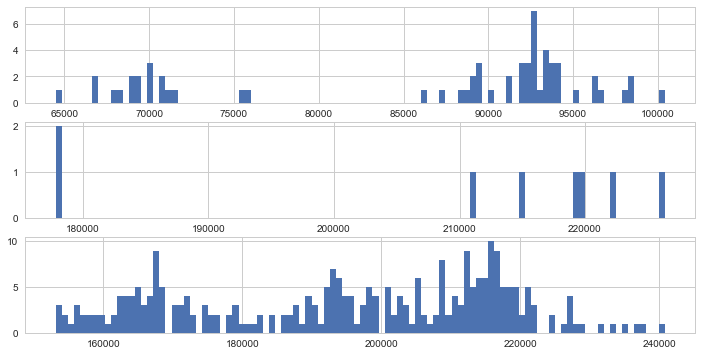

In [320]:
fig = plt.figure(figsize=(12,6))
plt.subplot(3,1,1)
plt1=plt.hist(df_P['V_remedy_df'],bins = 100)
plt.subplot(3,1,2)
plt2=plt.hist(df_B['V_remedy_df'],bins = 100)
plt.subplot(3,1,3)
plt3=plt.hist(df_B_D['V_remedy_df'],bins = 100)
#plt.hist(df_B['V_remedy_df'],bins=100)
#plt.hist(df_B_D['V_remedy_df'],bins=100)

- Evidence 2: Under the logistic function, the distribution of power consumption are more compact and more like mixture of normal distribution.

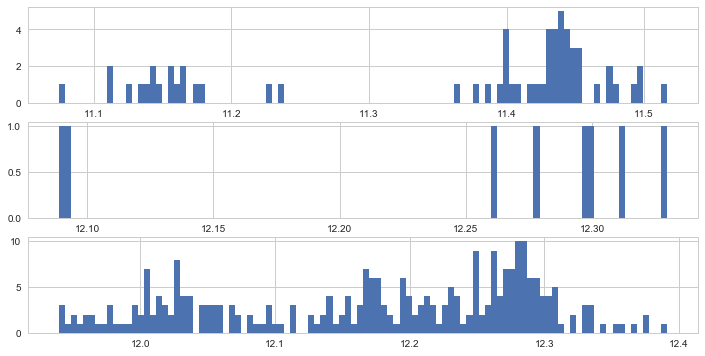

In [321]:
fig = plt.figure(figsize=(12,6))
plt.subplot(3,1,1)
plt1=plt.hist(np.log(1+df_P['V_remedy_df']),bins = 100)
plt.subplot(3,1,2)
plt2=plt.hist(np.log(1+df_B['V_remedy_df']),bins = 100)
plt.subplot(3,1,3)
plt3=plt.hist(np.log(1+df_B_D['V_remedy_df']),bins = 100)

## Task 9:

In [322]:
df_M_load_P['Weekday'] = df_M_load_P['T'].dt.dayofweek
df_M_load_B_D['Weekday'] = df_M_load_B_D['T'].dt.dayofweek

C:\Users\zhang\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\zhang\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


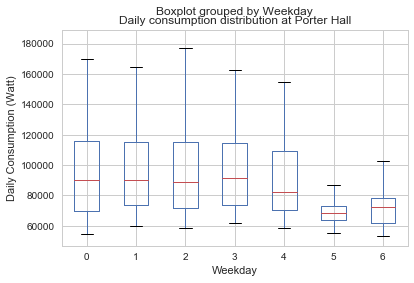

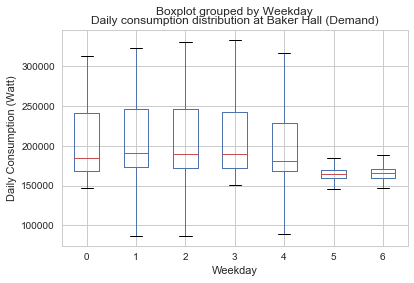

In [323]:
box1=df_M_load_P.boxplot(by="Weekday",column=['V_remedy_df'])
plt.title("Daily consumption distribution at Porter Hall")
plt.ylabel('Daily Consumption (Watt)')
plt.xlabel('Weekday')
box2=df_M_load_B_D.boxplot(by="Weekday",column=['V_remedy_df'])
plt.title("Daily consumption distribution at Baker Hall (Demand)")
plt.ylabel('Daily Consumption (Watt)')
plt.xlabel('Weekday')

## Task 10:

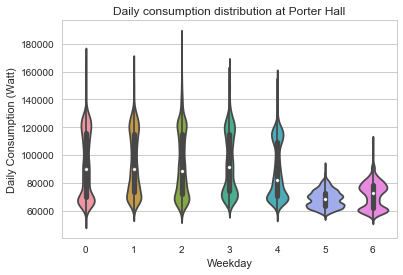

In [324]:
sns.set_style("whitegrid")
ax = sns.violinplot(x="Weekday", y="V_remedy_df", data=df_M_load_P)
ax.set_title("Daily consumption distribution at Porter Hall")
ax.set_ylabel('Daily Consumption (Watt)')
ax.set_xlabel('Weekday')

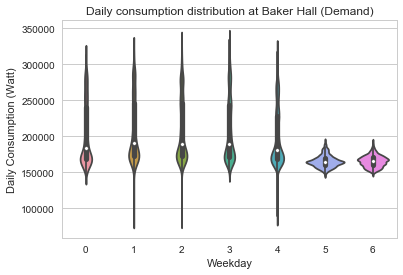

In [325]:
ax2 = sns.violinplot(x="Weekday", y="V_remedy_df", data=df_M_load_B_D)
ax2.set_title("Daily consumption distribution at Baker Hall (Demand)")
ax2.set_ylabel('Daily Consumption (Watt)')
ax2.set_xlabel('Weekday')

## Task 11:

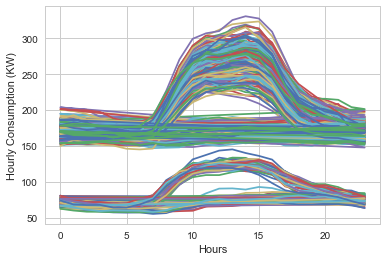

In [326]:
df_M_loadT_P=df_M_load_P[['T','V_remedy_df']].set_index('T')
grouped_h_P=df_M_loadT_P.resample('H').mean()
grouped_h_P=grouped_h_P.reset_index()
grouped_h_P['hour']=grouped_h_P['T'].dt.hour
grouped_h_P['day']=grouped_h_P['T'].dt.day
day_P=grouped_h_P['day'].unique()
#plt.plot(data[data['Point name'] == pointNames[1]]['Time'],'rd')
#grouped_h_P_mean=grouped_h_P.groupby('hour').agg(np.mean)/1000
#Baker
df_M_loadT_B_D=df_M_load_B_D[['T','V_remedy_df']].set_index('T')
grouped_h_B_D=df_M_loadT_B_D.resample('H').mean()
grouped_h_B_D=grouped_h_B_D.reset_index()
grouped_h_B_D['hour']=grouped_h_B_D['T'].dt.hour
grouped_h_B_D['day']=grouped_h_B_D['T'].dt.day
day_B_D=grouped_h_B_D['day'].unique()
#plot
for i in range(len(day_P)):
    plt.plot(grouped_h_P[grouped_h_P['day'] == day_P[i] ]['hour'],grouped_h_P[grouped_h_P['day'] == day_P[i]]['V_remedy_df']/1000)
for i in range(len(day_B_D)):
    plt.plot(grouped_h_B_D[grouped_h_B_D['day'] == day_B_D[i] ]['hour'],grouped_h_B_D[grouped_h_B_D['day'] == day_B_D[i]]['V_remedy_df']/1000)    
#plt.plot(grouped_h_B_D_mean,label="Baker Hall")
plt.ylabel('Hourly Consumption (KW)')
plt.xlabel('Hours')
#plt.legend()

## Task 12:

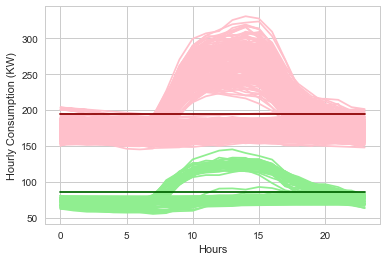

In [327]:
P_mean=np.mean(grouped_h_P['V_remedy_df'])/1000
B_D_mean=np.mean(grouped_h_B_D['V_remedy_df'])/1000
xnum=[x for x in range(0,24)]
for i in range(len(day_P)):
    plt.plot(grouped_h_P[grouped_h_P['day'] == day_P[i] ]['hour'],grouped_h_P[grouped_h_P['day'] == day_P[i]]['V_remedy_df']/1000,color='lightgreen')
for i in range(len(day_B_D)):
    plt.plot(grouped_h_B_D[grouped_h_B_D['day'] == day_B_D[i] ]['hour'],grouped_h_B_D[grouped_h_B_D['day'] == day_B_D[i]]['V_remedy_df']/1000,color='pink')    
#ax3=plt.plot(P_mean, color='darkgreen',label='Porter Hall Average')
plt.plot(xnum,list([P_mean]*24), color='darkgreen')
plt.plot(xnum,list([B_D_mean]*24), color='darkred')
plt.ylabel('Hourly Consumption (KW)')
plt.xlabel('Hours')

## Task 13:

- There are four clusters. For each building, there are days that with low variance, as well as days with peak period. The peak period appeared at about 10AM-3PM, which is reasonable. We could assign 4 clusters in the furture explore.
- If we assign 2 clusters in the real consumption, it must easy to detect the difference between two buildings because they are two far away.

## Task 14:

In [328]:
import scipy.spatial.distance as dist

In [329]:
grouped_h_P['date']=grouped_h_P['T'].dt.date
date_P=grouped_h_P['date'].unique()
date_P_24=pd.DataFrame(
    [(pn, len(grouped_h_P[grouped_h_P['date'] == pn])) for pn in date_P],
    columns=['Day','Number of samples']
)
date_P_24=date_P_24[date_P_24['Number of samples']==24]
#print(date_P_24)
#print(date_P_24['Number of samples'].unique())
L=[]
loads_P=np.append(L,[grouped_h_P[grouped_h_P['date']==i]['V_remedy_df'] for i in date_P_24['Day']])
loads_R_P=np.reshape(loads_P,(-1,24))
#print(loads_R_P)
#important
loads_R_P=loads_R_P[~np.isnan(loads_R_P).any(axis=1)]
#print(pd.DataFrame(loads_R_P))
#print(pd.DataFrame(loads_R_P).isnull().any())
#B_D
grouped_h_B_D['date']=grouped_h_B_D['T'].dt.date
date_B_D=grouped_h_B_D['date'].unique()
date_B_D_24=pd.DataFrame(
    [(pn, len(grouped_h_B_D[grouped_h_B_D['date'] == pn])) for pn in date_B_D],
    columns=['Day','Number of samples']
)
date_B_D_24=date_B_D_24[date_B_D_24['Number of samples']==24]
date_B_D_24['Number of samples'].unique()
L_B_D=[]
loads_B_D=np.append(L_B_D,[grouped_h_B_D[grouped_h_B_D['date']==i ]['V_remedy_df'] for i in date_B_D_24['Day']])
loads_R_B_D=np.reshape(loads_B_D,(-1,24))
#important
loads_R_B_D=loads_R_B_D[~np.isnan(loads_R_B_D).any(axis=1)]
loads=np.append(loads_R_P,loads_R_B_D)
loads=loads.reshape(-1,24)
loads.shape

(318, 24)

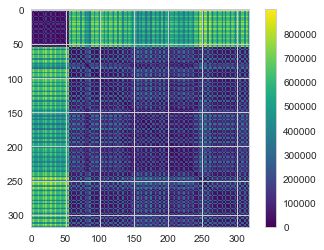

In [340]:
D = dist.squareform(dist.pdist(loads),'euclidean')
plt.imshow(D,cmap=plt.cm.viridis)
plt.colorbar()

In [331]:
T = lambda D: np.nansum(np.nansum(D))
print(T(D))

27677833570.2


## Task 15:

In [332]:
load_R_P_R=loads_R_P.reshape(-1,24)
load_R_B_D_R=loads_R_B_D.reshape(-1,24)
W_P= dist.squareform(dist.pdist(load_R_P_R),'euclidean')
W_B_D= dist.squareform(dist.pdist(load_R_B_D_R),'euclidean')
WC=(T(W_P)+T(W_B_D))
BC1= np.sum(T(dist.squareform(dist.pdist(np.append(load_R_P_R,load_R_B_D_R[loadi]).reshape(-1,24)),'euclidean'))-T(W_P) for loadi in range(len(load_R_B_D_R)))
BC2=np.sum(T(dist.squareform(dist.pdist(np.append(load_R_B_D_R,load_R_P_R[loadi]).reshape(-1,24)),'euclidean'))-T(W_B_D) for loadi in range(len(load_R_P_R)))
BC=0.5*(BC1+BC2)
print('WC='+str(WC))
print('BC='+str(BC))
print("TC="+str(WC+BC))

WC=11601757959.3
BC=16076075610.9
TC=27677833570.2


## Task 16:

In [333]:
y_3=np.random.choice([1,2,3],size=len(loads))
WC_3= 0.5* sum(T(dist.squareform(dist.pdist(loads[y_3==i]),'euclidean')) for i in list([1,2,3]))
BC_3=T(dist.squareform(dist.pdist(loads),'euclidean'))-WC_3
print('WC_3 = ' +str(WC_3))
print('BC_3 = ' +str(BC_3))
print('TC_3 = ' +str(WC_3+BC_3))
y_5=np.random.choice([1,2,3,4,5],size=len(loads))
WC_5= 0.5* sum(T(dist.squareform(dist.pdist(loads[y_5==i]),'euclidean')) for i in list([1,2,3,4,5]))
BC_5=T(dist.squareform(dist.pdist(loads),'euclidean'))-WC_5
print('WC_5 = ' +str(WC_5))
print('BC_5 = ' +str(BC_5))
print('TC_5 = ' +str(WC_5+BC_5))
y_10=np.random.choice([1,2,3,4,5,6,7,8,9,10],size=len(loads))
WC_10= 0.5* sum(T(dist.squareform(dist.pdist(loads[y_10==i]),'euclidean')) for i in list([1,2,3,4,5,6,7,8,9,10]))
BC_10=T(dist.squareform(dist.pdist(loads),'euclidean'))-WC_10
print('WC_10 = ' +str(WC_10))
print('BC_10 = ' +str(BC_10))
print('TC_10 = ' +str(WC_10+BC_10))

WC_3 = 4616236853.48
BC_3 = 23061596716.7
TC_3 = 27677833570.2
WC_5 = 2820821717.62
BC_5 = 24857011852.6
TC_5 = 27677833570.2
WC_10 = 1334109100.76
BC_10 = 26343724469.4
TC_10 = 27677833570.2


The total distance are all the same.

## Task 17:

In [334]:
from sklearn.cluster import KMeans

In [335]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(loads)
print(kmeans.labels_)
#print(sum(kmeans.labels_))
#load_R_P_R.shape

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


When we assign the cluster amount as 2, the KNN algorithm could detect the two different buildings.
Let's try to normalize the data, so that we could detect the temporal characteristics.

In [336]:
dailysum=np.sum(loads, axis=1)
loads_nor=[]
for i in range(len(loads)):
    loads_nor=np.append(loads_nor,loads[i]/dailysum[i])
loads_nor=loads_nor.reshape(-1,24)
loads_nor.shape

(318, 24)

[5 4 4 3 3 5 5 5 5 4 3 3 5 5 2 5 4 3 3 5 5 1 3 5 5 5 4 4 3 3 5 5 4 2 4 3 3
 5 5 5 5 4 3 3 5 4 5 5 4 3 3 5 5 4 3 3 4 6 1 1 2 2 6 2 6 1 1 2 6 4 2 4 1 1
 4 4 2 6 6 1 0 0 0 0 0 1 1 5 2 6 6 6 1 1 6 2 2 4 6 1 1 2 2 2 2 6 1 1 4 2 6
 0 1 1 2 6 2 6 6 1 1 2 6 2 6 6 1 1 2 2 2 2 6 1 1 6 0 0 2 6 1 1 6 6 0 0 0 1
 1 0 0 0 6 0 1 1 1 6 0 0 1 1 6 4 6 0 0 1 1 6 6 6 0 0 1 1 2 6 6 6 6 1 1 6 6
 0 0 1 1 6 6 6 0 1 1 1 6 6 6 6 6 1 1 0 0 0 0 0 1 1 0 6 0 0 0 1 1 0 0 0 0 0
 1 1 6 0 6 6 0 1 1 0 0 0 0 0 1 1 2 0 0 6 6 1 1 2 2 2 6 0 1 1 1 4 2 2 6 1 1
 2 6 2 6 6 1 1 2 6 2 6 6 1 1 2 2 6 6 0 1 1 2 2 6 1 1 2 2 6 6 6 1 1 2 2 6 6
 0 1 1 2 2 2 2 6 1 1 2 2 2 6 0 1 1 2 2 6 1 1]
(318,)


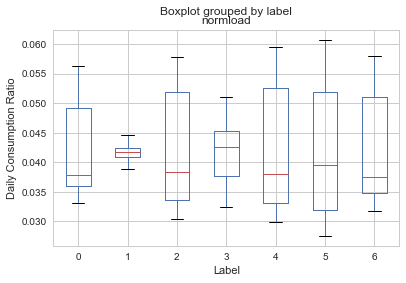

In [337]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(loads_nor)
print(kmeans.labels_)
print((kmeans.labels_).shape)
labels=np.repeat(kmeans.labels_,24)
loads_nor_r=loads_nor.reshape(-1,1)
loads_df=pd.DataFrame([(labels[i],float(loads_nor_r[i])) for i in range(len(labels))],columns=['label','normload'])
#loads_df
box1=loads_df.boxplot(by="label",column=['normload'])
plt.ylabel('Daily Consumption Ratio')
plt.xlabel('Label')

The characteristics of weekends are low variance. Maybe label 1 and label 3 represented the weekends. It seems the weekday distribution is hard to detected. But remember we have two different buildings inside, so let's go on.

[12  2 13  8  9 12  5  5  5  2  8  9  5  5 10  5  2  8  3 12 12  8  9 12  5
  5  2  2  8  3  5  5  2 10 13  8  3 12  5  5  5  2  8  9  5  2  5  5  2  8
  9  5  5  2  8  9 13  4 11  1 10 10  4 10 13 11  1 10  4 13  2 13  1 11  2
  2 10 13  0  1  7  0  7  6  6  1 11  5 10  0  4  7 11 11  4 10 10  2 13 11
  1 10 10  4 10  0 11 11  2 10  4  6  1  1 10  4 10 13  7 11  1 10 13 10  4
  4 11  1  4  4  4 10  4 11  1  4  7  7 10  0 11  1  4  0  0  7  6 11  1  6
  7  0  4  6 11 11  1  0  7  6 11  1 13 13  7  7  6  1 11  0  0  0  0  7 11
 11 10  0  7  0  7 11  1  0  4  7  0  1 11  4  0  0  7 11 11 11  0  7  7  7
  7  1  1  7  7  7  6  6 11  1  7  0  7  6  6  1  1  6  0  6  6  6 11 11  7
  7  7  7  6 11  1  7  6  6  6  6 11  8 10  6  7  0  0  1  1 10 10 10  4  7
  1  1  1  2 10 13 13  1  1 10  4 10 13  7  1 11 10  0 10  4  7 11  1  4  4
  4  0  7 11  1 10 10  4 11  1 10 10  4  4  0 11  1 10 10  0  0  6 11  1 10
  4 10  4  0 11 11 10 10 10 13  7 11  1 10 10  0  1  1]
(318,)


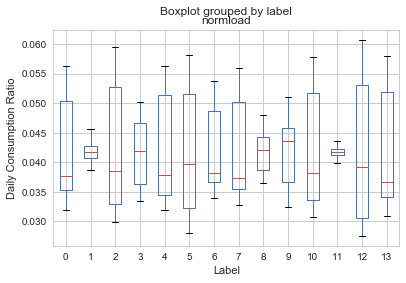

In [338]:
kmeans = KMeans(n_clusters=14, random_state=0).fit(loads_nor)
print(kmeans.labels_)
print((kmeans.labels_).shape)
labels=np.repeat(kmeans.labels_,24)
loads_nor_r=loads_nor.reshape(-1,1)
loads_df=pd.DataFrame([(labels[i],float(loads_nor_r[i])) for i in range(len(labels))],columns=['label','normload'])
#loads_df
box1=loads_df.boxplot(by="label",column=['normload'])
plt.ylabel('Daily Consumption Ratio')
plt.xlabel('Label')

Even if we assigned 14 labels, there are only two label, which is label 1 and label 11 seems like weekends, so it seems harder to detect the weekday pattern.
Let's try to mix the weekday together.

[0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1
 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0
 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0
 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1
 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0
 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1]
(318,)


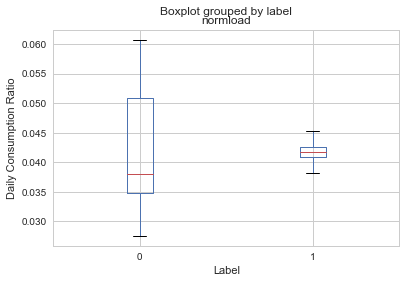

In [339]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(loads_nor)
print(kmeans.labels_)
print((kmeans.labels_).shape)
labels=np.repeat(kmeans.labels_,24)
loads_nor_r=loads_nor.reshape(-1,1)
loads_df=pd.DataFrame([(labels[i],float(loads_nor_r[i])) for i in range(len(labels))],columns=['label','normload'])
#loads_df
box1=loads_df.boxplot(by="label",column=['normload'])
plt.ylabel('Daily Consumption Ratio')
plt.xlabel('Label')

This time the KNN detected the weekends easily (Notice the pattern at 11 appeared in the labels.). That means the algorithm is reasonable and powerful to detec the temporal pattern.